In [1]:
import pandas as pd # good for reading data and manipulating tables of data 
import matplotlib.pyplot as plt # the general plotting library
import numpy as np # for general math stuff
import matplotlib.patches as mpatches
from itertools import cycle, islice
import csv
from collections import Counter
from datetime import datetime
import scipy.stats as ss 


In [2]:


def readkeylog_total(key,id):
    
    path = 'D:/git/HoHCI/shoulder/data/UT03AN/keylog_UT03AN.csv'
    print(path)
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        keycounter = 0
        for row in csv_reader:
            if key in row[1]:
                keycounter = keycounter + 1
    print('participant ' + str(id) + ' pressed' + str(key) + ' a total of ' + str(keycounter) + ' times')
    return 'participant ' + str(id) + ' pressed' + str(key) + ' a total of ' + str(keycounter) + ' times'

readkeylog_total('Key.backspace','UT03AN')

D:/git/HoHCI/shoulder/data/UT03AN/keylog_UT03AN.csv
participant UT03AN pressedKey.backspace a total of 833 times


'participant UT03AN pressedKey.backspace a total of 833 times'

In [3]:
def get_trial_timestamps(id):
    # for just one person 
    path = "../data/Fragebogen.xlsx"

    codes = pd.read_excel(path)
    df_id = codes.loc[codes['ID'] == id]
    return df_id[['start','stop','condition']]
ts = get_trial_timestamps('TA09BE')
str(ts.iloc[0,1])



'2022-06-13 12:17:25'

In [4]:

def readkeylog_per_trial(key_list,id, start, stop):
    #path = 'D:/git/HoHCI/shoulder/data/UT03AN/keylog_UT03AN.csv'
    path =  '../data/' + id + '/keylog_' + id + '.csv'
    #print(path)
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        keycounter = 0

        for row in csv_reader:
                current_tp = datetime.strptime(f"{row[0]}".strip(), "%Y-%m-%d %H:%M:%S,%f")
                if( start <current_tp and stop > current_tp):
                    if (key_list[0] in row[1]) or (key_list[1] in row[1]):

                        keycounter = keycounter + 1
    #print('participant ' + str(id) + ' pressed' + str(key) + ' a total of ' + str(keycounter) + ' times')
    return str(keycounter)
ts = get_trial_timestamps('TA09BE')
d1 = datetime.strptime(str(ts.iloc[0,0])+",000", "%Y-%m-%d %H:%M:%S,%f")
d2 = datetime.strptime(str(ts.iloc[0,1])+",999", "%Y-%m-%d %H:%M:%S,%f")

readkeylog_per_trial(['Key.backspace','Key.delete'],'TA09BE',d1,d2)

'98'

In [7]:
# test friedmann test
group1 = [9]
group2 = [3]
group3 = [3]
group4 = [1]
ss.friedmanchisquare(group1, group2, group3, group4)

FriedmanchisquareResult(statistic=2.999999999999999, pvalue=0.39162517627108917)

In [5]:
def key_press_for_participant(id):
    ts = get_trial_timestamps(id)
    list_results = []
    for i in range(4):
        d1 = datetime.strptime(str(ts.iloc[i,0])+",000", "%Y-%m-%d %H:%M:%S,%f")
        d2 = datetime.strptime(str(ts.iloc[i,1])+",999", "%Y-%m-%d %H:%M:%S,%f")
        list_results.append([ ts.iloc[i,2] , readkeylog_per_trial('Key.backspace',id,d1,d2)])
    return list_results

key_press_for_participant('TA09BE')

[['A', '631'], ['B', '412'], ['D', '599'], ['C', '367']]

In [6]:
key_press_for_participant('CH02OT')

[['D', '766'], ['A', '742'], ['C', '805'], ['B', '695']]

In [7]:
list_of_ids = ['CH02OT','CL03RA','DA12JO','DI09XA','FI10GA','GA06MA','HI11JO','IR04VA','KE08ST','LU07NI','NA07WA','SA06JO','SI02HA','SU05DI','TA09BE','UT03AN']
list_results = []

for id in list_of_ids:
    print(id)
    list_results.append(key_press_for_participant(id)+[id])

print(list_results)

CH02OT
CL03RA
DA12JO
DI09XA
FI10GA
GA06MA
HI11JO
IR04VA
KE08ST
LU07NI
NA07WA
SA06JO
SI02HA
SU05DI
TA09BE
UT03AN
[[['D', '766'], ['A', '742'], ['C', '805'], ['B', '695'], 'CH02OT'], [['D', '1589'], ['A', '1253'], ['C', '1702'], ['B', '1554'], 'CL03RA'], [['D', '1200'], ['A', '1081'], ['C', '997'], ['B', '1037'], 'DA12JO'], [['D', '639'], ['A', '732'], ['C', '876'], ['B', '819'], 'DI09XA'], [['B', '499'], ['C', '684'], ['A', '504'], ['D', '496'], 'FI10GA'], [['C', '923'], ['D', '530'], ['B', '537'], ['A', '736'], 'GA06MA'], [['C', '1268'], ['D', '1248'], ['B', '1377'], ['A', '1441'], 'HI11JO'], [['B', '1166'], ['C', '1221'], ['A', '1215'], ['D', '1209'], 'IR04VA'], [['C', '824'], ['D', '957'], ['B', '960'], ['A', '867'], 'KE08ST'], [['B', '856'], ['C', '810'], ['A', '883'], ['D', '860'], 'LU07NI'], [['C', '1036'], ['D', '1146'], ['B', '1274'], ['A', '1290'], 'NA07WA'], [['A', '1085'], ['B', '922'], ['D', '932'], ['C', '889'], 'SA06JO'], [['B', '1117'], ['C', '1207'], ['A', '1158'], ['D',

In [9]:
subject_list = []
response_list = []
condition_list = []
for i in range(len(list_results)):
    for j in range(len(list_results[0])-1):
        subject_list.append(list_results[i][4])
        response_list.append(float(list_results[i][j][1]))
        condition_list.append(list_results[i][j][0])
len(condition_list)
print(condition_list)
data = {'response':response_list, 'condition':condition_list, 'subject':subject_list}
df = pd.DataFrame(data)
from statsmodels.stats.anova import AnovaRM
#print(AnovaRM(data=df, depvar='response',  subject='subject', within=['condition']).fit())

['D', 'A', 'C', 'B', 'D', 'A', 'C', 'B', 'D', 'A', 'C', 'B', 'D', 'A', 'C', 'B', 'B', 'C', 'A', 'D', 'C', 'D', 'B', 'A', 'C', 'D', 'B', 'A', 'B', 'C', 'A', 'D', 'C', 'D', 'B', 'A', 'B', 'C', 'A', 'D', 'C', 'D', 'B', 'A', 'A', 'B', 'D', 'C', 'B', 'C', 'A', 'D', 'A', 'B', 'D', 'C', 'A', 'B', 'D', 'C', 'A', 'B', 'D', 'C']


In [22]:
a_count = []
b_count = []
c_count = []
d_count = []
print(list_results[0][0][1])
for i in range(16):
    for j in range(4):
        if list_results[i][j][0] == 'A':
            #print( list_results[i][0][1])
            a_count.append(int(list_results[i][j][1]))
        if list_results[i][j][0] == 'B':
            #print( list_results[i][0][1])
            b_count.append(int(list_results[i][j][1]))
        if list_results[i][j][0] == 'C':
            #print( list_results[i][0][1])
            c_count.append(int(list_results[i][j][1]))
        if list_results[i][j][0] == 'D':
            #print( list_results[i][0][1])
            d_count.append(int(list_results[i][j][1]))

print([a_count,b_count,c_count,d_count])
print(sum(a_count)/len(a_count))
print(sum(b_count)/len(b_count))
print(sum(c_count)/len(c_count))
print(sum(d_count)/len(d_count))
print(ss.friedmanchisquare(a_count, b_count, c_count, d_count))
import scikit_posthocs as sp
print(sp.posthoc_nemenyi_friedman(np.array([a_count, b_count, c_count, d_count]).T))
print(sp.posthoc_ttest(np.array([a_count, b_count, c_count, d_count])))
# [720, 663, 820, 908]
#Ergebnis: [3865, 3638, 4051, 4194]

766
[[742, 1253, 1081, 732, 504, 736, 1441, 1215, 867, 883, 1290, 1085, 1158, 1083, 631, 1066], [695, 1554, 1037, 819, 499, 537, 1377, 1166, 960, 856, 1274, 922, 1117, 922, 412, 962], [805, 1702, 997, 876, 684, 923, 1268, 1221, 824, 810, 1036, 889, 1207, 889, 367, 863], [766, 1589, 1200, 639, 496, 530, 1248, 1209, 957, 860, 1146, 932, 1262, 932, 599, 942]]
985.4375
944.3125
960.0625
956.6875
FriedmanchisquareResult(statistic=4.349999999999994, pvalue=0.22606656856305365)
          0         1         2         3
0  1.000000  0.220908  0.354855  0.516551
1  0.220908  1.000000  0.900000  0.900000
2  0.354855  0.900000  1.000000  0.900000
3  0.516551  0.900000  0.900000  1.000000
          1         2         3         4
1  1.000000  0.692570  0.799761  0.778556
2  0.692570  1.000000  0.884887  0.911068
3  0.799761  0.884887  1.000000  0.974870
4  0.778556  0.911068  0.974870  1.000000


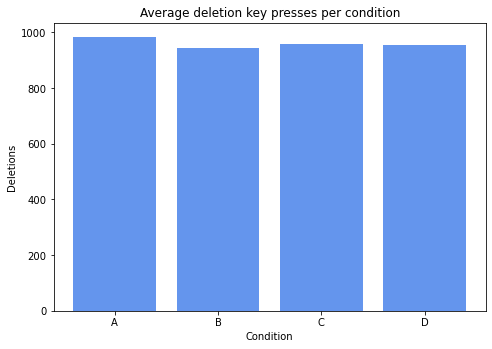

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['A', 'B', 'C', 'D']
students = [sum(a_count)/len(a_count),sum(b_count)/len(b_count),sum(c_count)/len(c_count),sum(d_count)/len(d_count)]
ax.bar(langs,students,color='cornflowerblue')
plt.title('Average deletion key presses per condition')
plt.xlabel('Condition')
plt.ylabel('Deletions')
plt.show()


In [19]:
ss.f_oneway(a_count,b_count,c_count,d_count)


F_onewayResult(statistic=0.05439948420891575, pvalue=0.9831318723711912)

# Time Analysis

In [26]:
def get_trial_timestamps(id):
    # for just one person 
    path = "../data/Fragebogen.xlsx"

    codes = pd.read_excel(path)
    df_id = codes.loc[codes['ID'] == id]
    return df_id[['start','stop','condition']]
ts = get_trial_timestamps('TA09BE')
str(ts.iloc[0,1])

list_of_ids = ['CH02OT','CL03RA','DA12JO','DI09XA','FI10GA','GA06MA','HI11JO','IR04VA','KE08ST','LU07NI','NA07WA','SA06JO','SI02HA','SU05DI','TA09BE','UT03AN']
list_results = []




In [27]:

def readtime_per_trial(id, start, stop):
    #path = 'D:/git/HoHCI/shoulder/data/UT03AN/keylog_UT03AN.csv'
    path =  '../data/' + id + '/keylog_' + id + '.csv'
    #print(path)
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        old_timestamp = None
        max_general =0
        current_diff = 0

        for row in csv_reader:
                current_tp = datetime.strptime(f"{row[0]}".strip(), "%Y-%m-%d %H:%M:%S,%f")
                if( start <current_tp and stop > current_tp):
                    if(old_timestamp != None):
                        current_diff = current_tp - old_timestamp
                        if(max_general == 0):
                            max_general = current_diff  
                        if(current_diff > max_general ):
                            max_general = current_diff
                        old_timestamp = current_tp
                    else:
                        old_timestamp = current_tp

def avg_pause_per_trial(id, start, stop):
    #path = 'D:/git/HoHCI/shoulder/data/UT03AN/keylog_UT03AN.csv'
    path =  '../data/' + id + '/keylog_' + id + '.csv'
    #print(path)
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        old_timestamp = None

        current_diff = []

        for row in csv_reader:
                current_tp = datetime.strptime(f"{row[0]}".strip(), "%Y-%m-%d %H:%M:%S,%f")
                if( start <current_tp and stop > current_tp):
                    if(old_timestamp != None):
                        current_diff.append( current_tp - old_timestamp)
                        old_timestamp = current_tp
                    else:
                        old_timestamp = current_tp
    #print('participant ' + str(id) + ' pressed' + str(key) + ' a total of ' + str(keycounter) + ' times')
    return np.mean(current_diff)
ts = get_trial_timestamps('TA09BE')
d1 = datetime.strptime(str(ts.iloc[0,0])+",000", "%Y-%m-%d %H:%M:%S,%f")
d2 = datetime.strptime(str(ts.iloc[0,1])+",999", "%Y-%m-%d %H:%M:%S,%f")

readtime_per_trial('TA09BE',d1,d2)

def key_pause_for_participant(id):
    ts = get_trial_timestamps(id)
    list_results = []
    for i in range(4):
        d1 = datetime.strptime(str(ts.iloc[i,0])+",000", "%Y-%m-%d %H:%M:%S,%f")
        d2 = datetime.strptime(str(ts.iloc[i,1])+",999", "%Y-%m-%d %H:%M:%S,%f")
        list_results.append([ ts.iloc[i,2] , avg_pause_per_trial(id,d1,d2)])
    return list_results

datatime = key_pause_for_participant('TA09BE')
datatime[0][1].microseconds

413050

In [28]:
list_results_pause = []
for id in list_of_ids:
    print(id)
    list_results_pause.append(key_pause_for_participant(id)+[id])

print(list_results_pause)

CH02OT
CL03RA
DA12JO
DI09XA
FI10GA
GA06MA
HI11JO
IR04VA
KE08ST
LU07NI
NA07WA
SA06JO
SI02HA
SU05DI
TA09BE
UT03AN
[[['D', datetime.timedelta(microseconds=313778)], ['A', datetime.timedelta(microseconds=317139)], ['C', datetime.timedelta(microseconds=282993)], ['B', datetime.timedelta(microseconds=338002)], 'CH02OT'], [['D', datetime.timedelta(microseconds=172095)], ['A', datetime.timedelta(microseconds=223715)], ['C', datetime.timedelta(microseconds=170967)], ['B', datetime.timedelta(microseconds=177697)], 'CL03RA'], [['D', datetime.timedelta(microseconds=231781)], ['A', datetime.timedelta(microseconds=256527)], ['C', datetime.timedelta(microseconds=246629)], ['B', datetime.timedelta(microseconds=302339)], 'DA12JO'], [['D', datetime.timedelta(microseconds=333942)], ['A', datetime.timedelta(microseconds=277244)], ['C', datetime.timedelta(microseconds=261017)], ['B', datetime.timedelta(microseconds=281144)], 'DI09XA'], [['B', datetime.timedelta(microseconds=385771)], ['C', datetime.timedel

In [29]:
subject_list = []
response_list = []
condition_list = []
for i in range(len(list_results_pause)):
    for j in range(len(list_results_pause[0])-1):
        subject_list.append(list_results_pause[i][4])
        response_list.append(list_results_pause[i][j][1])
        condition_list.append(list_results_pause[i][j][0])
len(condition_list)

data = {'response':response_list, 'condition':condition_list, 'subject':subject_list}
df = pd.DataFrame(data)
from statsmodels.stats.anova import AnovaRM
#print(AnovaRM(data=df, depvar='response',  subject='subject', within=['condition']).fit())

In [31]:
a_count = []
b_count = []
c_count = []
d_count = []
print(list_results_pause[0])
for i in range(16):
    for j in range(4):
        if list_results_pause[i][j][0] == 'A':
            #print( list_results[i][0][1])
            a_count.append(list_results_pause[i][j][1].microseconds)
        if list_results_pause[i][j][0] == 'B':
            #print( list_results[i][0][1])
            b_count.append(list_results_pause[i][j][1].microseconds)
        if list_results_pause[i][j][0] == 'C':
            #print( list_results[i][0][1])
            c_count.append(list_results_pause[i][j][1].microseconds)
        if list_results_pause[i][j][0] == 'D':
            #print( list_results[i][0][1])
            d_count.append(list_results_pause[i][j][1].microseconds)

print([a_count,b_count,c_count,d_count])
#print(np.mean(d_count).timestamp())
print([np.median(a_count),np.median(b_count),np.median(c_count),np.median(d_count)])
print([np.std(a_count),np.std(b_count),np.std(c_count),np.std(d_count)])
print(ss.friedmanchisquare(a_count, b_count, c_count, d_count))
print(sp.posthoc_nemenyi_friedman(np.array([a_count, b_count, c_count, d_count]).T))
print(sp.posthoc_ttest(np.array([a_count, b_count, c_count, d_count])))
# [720, 663, 820, 908]
#Ergebnis: [3865, 3638, 4051, 4194]

[['D', datetime.timedelta(microseconds=313778)], ['A', datetime.timedelta(microseconds=317139)], ['C', datetime.timedelta(microseconds=282993)], ['B', datetime.timedelta(microseconds=338002)], 'CH02OT']
[[317139, 223715, 256527, 277244, 533928, 170874, 166626, 236405, 275596, 239768, 181429, 238431, 210189, 218165, 413050, 217029], [338002, 177697, 302339, 281144, 385771, 163360, 168312, 229054, 235231, 238103, 193949, 243976, 213270, 243976, 465919, 255326], [282993, 170967, 246629, 261017, 438842, 182590, 179979, 243346, 305148, 242626, 211527, 249606, 247146, 249606, 458478, 265604], [313778, 172095, 231781, 333942, 886447, 191803, 196768, 224354, 274226, 204016, 190419, 232218, 227299, 232218, 348935, 243987]]
[237418.0, 241039.5, 248376.0, 231999.5]
[91488.8582951626, 79119.9357990124, 78033.21176348568, 164085.98660758443]
FriedmanchisquareResult(statistic=3.9749999999999943, pvalue=0.2641763631672101)
          0         1         2         3
0  1.000000  0.823993  0.283091  0.9

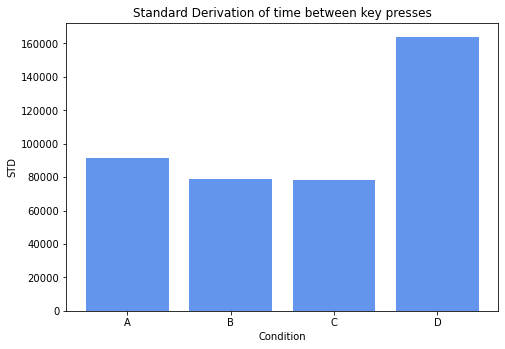

Power_divergenceResult(statistic=array([ 513102.26494984,  387517.43668069,  367986.86419408,
       1530230.98805271]), pvalue=array([0., 0., 0., 0.]))

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['A', 'B', 'C', 'D']
students = [np.std(a_count),np.std(b_count),np.std(c_count),np.std(d_count)]
ax.bar(langs,students,color='cornflowerblue')
plt.title('Standard Derivation of time between key presses')
plt.xlabel('Condition')
plt.ylabel('STD')
plt.show()

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
obs = np.array([a_count,b_count,c_count,d_count]).T
chisquare(obs)

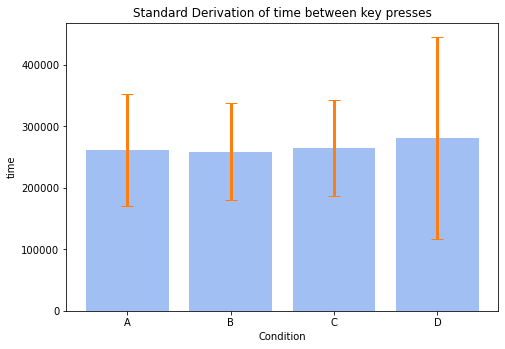

Power_divergenceResult(statistic=array([ 513102.26494984,  387517.43668069,  367986.86419408,
       1530230.98805271]), pvalue=array([0., 0., 0., 0.]))

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['A', 'B', 'C', 'D']
x_pos = np.arange(len(langs))
students = [np.mean(a_count),np.mean(b_count),np.mean(c_count),np.mean(d_count)]
students_std = [np.std(a_count),np.std(b_count),np.std(c_count),np.std(d_count)]
ax.bar(langs,students,alpha=0.6,yerr=students_std,capsize=6, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=3))
plt.title('Standard Derivation of time between key presses')
plt.xlabel('Condition')
plt.ylabel('Time')
plt.show()

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
obs = np.array([a_count,b_count,c_count,d_count]).T
chisquare(obs)

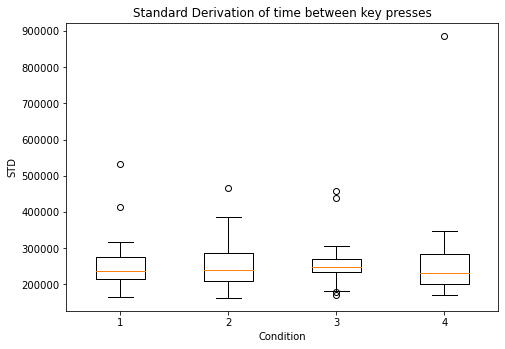

Power_divergenceResult(statistic=array([ 513102.26494984,  387517.43668069,  367986.86419408,
       1530230.98805271]), pvalue=array([0., 0., 0., 0.]))

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['A', 'B', 'C', 'D']
students = [a_count,b_count,c_count,d_count]
ax.boxplot(students)
plt.title('Standard Derivation of time between key presses')
plt.xlabel('Condition')
plt.ylabel('STD')
plt.show()

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
obs = np.array([a_count,b_count,c_count,d_count]).T
chisquare(obs)

In [29]:
F = np.std(d_count) / np.std(a_count+b_count+c_count)
df1 = len(d_count) - 1
df2 = len(a_count+b_count+c_count) - 1
alpha = 0.05 #Or whatever you want your alpha to be.
p_value = ss.f.cdf(F, df1, df2)
print(p_value)
if p_value > alpha:
  print('NO')

0.961131591946261
NO


In [ ]:
stat, p = ss.bartlett(a_count, b_count, c_count,d_count)
print(stat)
print(p)

## typing speed

In [32]:
def get_trial_timestamps(id):
    # for just one person 
    path = "../data/Fragebogen.xlsx"

    codes = pd.read_excel(path)
    df_id = codes.loc[codes['ID'] == id]
    return df_id[['start','stop','condition']]
ts = get_trial_timestamps('TA09BE')
str(ts.iloc[0,1])

list_of_ids = ['CH02OT','CL03RA','DA12JO','DI09XA','FI10GA','GA06MA','HI11JO','IR04VA','KE08ST','LU07NI','NA07WA','SA06JO','SI02HA','SU05DI','TA09BE','UT03AN']
list_results = []

In [33]:


def keystrokes_per_trial(id, start, stop):
    #path = 'D:/git/HoHCI/shoulder/data/UT03AN/keylog_UT03AN.csv'
    path =  'D:/git/HoHCI/shoulder/data/' + id + '/keylog_' + id + '.csv'
    #print(path)
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        counter = 0
        for row in csv_reader:
                current_tp = datetime.strptime(f"{row[0]}".strip(), "%Y-%m-%d %H:%M:%S,%f")
                if( start <current_tp and stop > current_tp):
                    counter = counter + 1
    #print('participant ' + str(id) + ' pressed' + str(key) + ' a total of ' + str(keycounter) + ' times')
    trial_time = stop - start
    trial_time = trial_time.microseconds
    return counter / trial_time
ts = get_trial_timestamps('TA09BE')
d1 = datetime.strptime(str(ts.iloc[0,0])+",000", "%Y-%m-%d %H:%M:%S,%f")
d2 = datetime.strptime(str(ts.iloc[0,1])+",999", "%Y-%m-%d %H:%M:%S,%f")

print(keystrokes_per_trial('TA09BE',d1,d2))

def keystrokes_for_participant(id):
    ts = get_trial_timestamps(id)
    list_results = []
    for i in range(4):
        d1 = datetime.strptime(str(ts.iloc[i,0])+",000", "%Y-%m-%d %H:%M:%S,%f")
        d2 = datetime.strptime(str(ts.iloc[i,1])+",999", "%Y-%m-%d %H:%M:%S,%f")
        list_results.append([ ts.iloc[i,2] , keystrokes_per_trial(id,d1,d2)])
    return list_results

datatime = keystrokes_for_participant('TA09BE')
datatime[0][1]



0.0014314314314314315


0.0014314314314314315

In [34]:
list_results_keystrokes = []
for id in list_of_ids:
    print(id)
    list_results_keystrokes.append(keystrokes_for_participant(id))

print(list_results_keystrokes)

CH02OT
CL03RA
DA12JO
DI09XA
FI10GA
GA06MA
HI11JO
IR04VA
KE08ST
LU07NI
NA07WA
SA06JO
SI02HA
SU05DI
TA09BE
UT03AN
[[['D', 0.001888888888888889], ['A', 0.0018278278278278277], ['C', 0.002091091091091091], ['B', 0.0016366366366366365]], [['D', 0.0034754754754754754], ['A', 0.0026496496496496496], ['C', 0.0034614614614614614], ['B', 0.0033253253253253253]], [['D', 0.0025375375375375374], ['A', 0.0022922922922922924], ['C', 0.00236036036036036], ['B', 0.0018718718718718718]], [['D', 0.0018378378378378379], ['A', 0.001957957957957958], ['C', 0.0022592592592592595], ['B', 0.002065065065065065]], [['B', 0.0012362362362362362], ['C', 0.0014164164164164163], ['A', 0.0012212212212212212], ['D', 0.0012112112112112113]], [['C', 0.0025065065065065064], ['D', 0.0014104104104104105], ['B', 0.0014984984984984986], ['A', 0.002005005005005005]], [['C', 0.0032802802802802803], ['D', 0.00293993993993994], ['B', 0.0034434434434434434], ['A', 0.0035875875875875877]], [['B', 0.0025765765765765765], ['C', 0.002

In [35]:
a_keystrokes = []
b_keystrokes = []
c_keystrokes = []
d_keystrokes = []
print(list_results_keystrokes[0])
for i in range(16):
    for j in range(4):
        if list_results_keystrokes[i][j][0] == 'A':
            #print( list_results[i][0][1])
            a_keystrokes.append(list_results_keystrokes[i][j][1])
        if list_results_keystrokes[i][j][0] == 'B':
            #print( list_results[i][0][1])
            b_keystrokes.append(list_results_keystrokes[i][j][1])
        if list_results_keystrokes[i][j][0] == 'C':
            #print( list_results[i][0][1])
            c_keystrokes.append(list_results_keystrokes[i][j][1])
        if list_results_keystrokes[i][j][0] == 'D':
            #print( list_results[i][0][1])
            d_keystrokes.append(list_results_keystrokes[i][j][1])

print([a_keystrokes,b_keystrokes,c_keystrokes,d_keystrokes])
#print(np.mean(d_count).timestamp())
print([np.median(a_keystrokes),np.median(b_keystrokes),np.median(c_keystrokes),np.median(d_keystrokes)])
print([np.std(a_keystrokes),np.std(b_keystrokes),np.std(c_keystrokes),np.std(c_keystrokes)])
print(ss.friedmanchisquare(a_keystrokes, b_keystrokes, c_keystrokes, d_keystrokes))
print(sp.posthoc_nemenyi_friedman(np.array([a_keystrokes, b_keystrokes, c_keystrokes, d_keystrokes]).T))
print(sp.posthoc_ttest(np.array([a_keystrokes, b_keystrokes, c_keystrokes, d_keystrokes])))
# [720, 663, 820, 908]
#Ergebnis: [3865, 3638, 4051, 4194]

[['D', 0.001888888888888889], ['A', 0.0018278278278278277], ['C', 0.002091091091091091], ['B', 0.0016366366366366365]]
[[0.0018278278278278277, 0.0026496496496496496, 0.0022922922922922924, 0.001957957957957958, 0.0012212212212212212, 0.002005005005005005, 0.0035875875875875877, 0.0026156156156156157, 0.002079079079079079, 0.0024824824824824826, 0.0032332332332332334, 0.0027127127127127126, 0.0026976976976976976, 0.0027107107107107106, 0.0014314314314314315, 0.002717717717717718], [0.0016366366366366365, 0.0033253253253253253, 0.0018718718718718718, 0.002065065065065065, 0.0012362362362362362, 0.0014984984984984986, 0.0034434434434434434, 0.0025765765765765765, 0.0025025025025025025, 0.0025225225225225223, 0.003088088088088088, 0.00236036036036036, 0.002871871871871872, 0.00236036036036036, 0.0011861861861861861, 0.0023213213213213214], [0.002091091091091091, 0.0034614614614614614, 0.00236036036036036, 0.0022592592592592595, 0.0014164164164164163, 0.0025065065065065064, 0.0032802802802